In [9]:
import requests
import json
import time
import matplotlib.pyplot as plt
import pandas as pd

from abilities import mtg_abilities

In [3]:
def get_all_set_codes():
    set_codes = []
    url = "https://api.scryfall.com/sets"
    
    while url:
        response = requests.get(url)
        if response.status_code == 200:
            json_data = response.json()
            set_codes.extend([set_data["code"] for set_data in json_data["data"]])
            url = json_data.get("next_page")
            time.sleep(0.1)  # respect API rate limits
        else:
            print("Failed to fetch data:", response.status_code)
            break
    
    return set_codes

def get_cards_data(set_code):
    cards = []
    url = f"https://api.scryfall.com/cards/search?q=set:{set_code}"
    
    while url:
        response = requests.get(url)
        if response.status_code == 200:
            json_data = response.json()
            cards.extend(json_data["data"])
            url = json_data.get("next_page")
            time.sleep(0.1)  # respect API rate limits
        else:
            print("Failed to fetch data:", response.status_code)
            break
    
    return cards

def save_cards_to_json(cards, filename="mtg_cards.json"):
    with open(filename, "w", encoding="utf-8") as f:
        json.dump(cards, f, ensure_ascii=False, indent=4)

# Fetching set codes dynamically
sets = get_all_set_codes()

# Collecting cards from all sets and saving them
all_cards = []
for set_code in sets:
    print(f"Fetching cards from set: {set_code}")
    cards = get_cards_data(set_code)
    all_cards.extend(cards)
    # If you prefer separate JSONs for each set, uncomment and indent the next line
    # save_cards_to_json(cards, filename=f"{set_code}_cards.json")

# Save all cards into one JSON
save_cards_to_json(all_cards)

Fetching cards from set: rvr
Fetching cards from set: pw24
Fetching cards from set: spg
Fetching cards from set: lci
Fetching cards from set: lcc
Fetching cards from set: rex
Fetching cards from set: tlci
Failed to fetch data: 404
Fetching cards from set: who
Fetching cards from set: twho
Fetching cards from set: ywoe
Fetching cards from set: pwoe
Fetching cards from set: twoe
Fetching cards from set: wwoe
Fetching cards from set: wot
Fetching cards from set: twoc
Fetching cards from set: awoe
Fetching cards from set: woc
Fetching cards from set: woe
Fetching cards from set: pmda
Fetching cards from set: p30t
Fetching cards from set: pagl
Fetching cards from set: acmm
Fetching cards from set: tcmm
Fetching cards from set: cmm
Fetching cards from set: ha7
Fetching cards from set: ea3
Fetching cards from set: pf23
Fetching cards from set: pltr
Fetching cards from set: ltc
Fetching cards from set: tltc
Fetching cards from set: fltr
Fetching cards from set: tltr
Fetching cards from set: lt

Fetching cards from set: ps19
Fetching cards from set: pm20
Fetching cards from set: ppp1
Fetching cards from set: tm20
Fetching cards from set: m20
Fetching cards from set: ss2
Fetching cards from set: pmh1
Fetching cards from set: mh1
Fetching cards from set: amh1
Fetching cards from set: tmh1
Fetching cards from set: pwar
Fetching cards from set: twar
Fetching cards from set: war
Fetching cards from set: j19
Fetching cards from set: prw2
Fetching cards from set: tgk2
Fetching cards from set: gk2
Fetching cards from set: prna
Fetching cards from set: rna
Fetching cards from set: trna
Fetching cards from set: pf19
Fetching cards from set: opca
Fetching cards from set: puma
Fetching cards from set: tuma
Fetching cards from set: uma
Fetching cards from set: g18
Fetching cards from set: gnt
Fetching cards from set: prwk
Fetching cards from set: tgk1
Fetching cards from set: gk1
Fetching cards from set: pgrn
Fetching cards from set: tgrn
Fetching cards from set: grn
Fetching cards from se

Fetching cards from set: tisd
Fetching cards from set: isd
Fetching cards from set: pisd
Fetching cards from set: ddh
Fetching cards from set: tddh
Fetching cards from set: v11
Fetching cards from set: tm12
Fetching cards from set: m12
Fetching cards from set: pm12
Fetching cards from set: ocmd
Fetching cards from set: pcmd
Fetching cards from set: cmd
Fetching cards from set: td2
Fetching cards from set: tnph
Fetching cards from set: nph
Fetching cards from set: pnph
Fetching cards from set: ddg
Fetching cards from set: tddg
Fetching cards from set: mbs
Fetching cards from set: tmbs
Fetching cards from set: pmbs
Fetching cards from set: me4
Fetching cards from set: pmps11
Fetching cards from set: pdp12
Fetching cards from set: pw11
Fetching cards from set: ps11
Fetching cards from set: g11
Fetching cards from set: p11
Fetching cards from set: olgc
Fetching cards from set: f11
Fetching cards from set: pd2
Fetching cards from set: td0
Fetching cards from set: tsom
Fetching cards from se

Fetching cards from set: pred
Fetching cards from set: pcel
Fetching cards from set: parl
Fetching cards from set: plgm
Fetching cards from set: rqs
Fetching cards from set: all
Fetching cards from set: ptc
Fetching cards from set: o90p
Fetching cards from set: hml
Fetching cards from set: rin
Fetching cards from set: ren
Fetching cards from set: bchr
Fetching cards from set: chr
Fetching cards from set: ice
Fetching cards from set: 4bb
Fetching cards from set: 4ed
Fetching cards from set: pmei
Fetching cards from set: fem
Fetching cards from set: phpr
Fetching cards from set: drk
Fetching cards from set: pdrc
Fetching cards from set: sum
Fetching cards from set: leg
Fetching cards from set: 3ed
Fetching cards from set: fbb
Fetching cards from set: atq
Fetching cards from set: arn
Fetching cards from set: cei
Fetching cards from set: ced
Fetching cards from set: 2ed
Fetching cards from set: leb
Fetching cards from set: lea


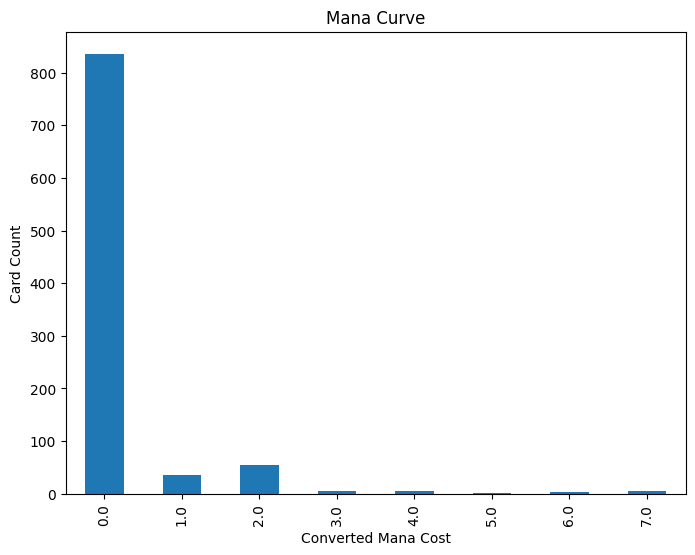

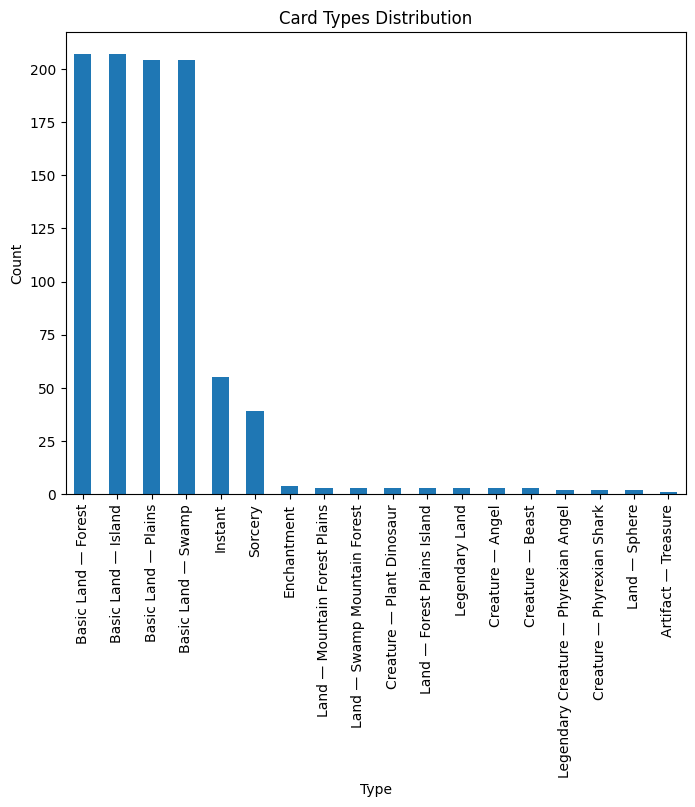

/tmp/ipykernel_17756/694776704.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  colors = df_deck['color_identity'].apply(pd.Series).stack().value_counts()


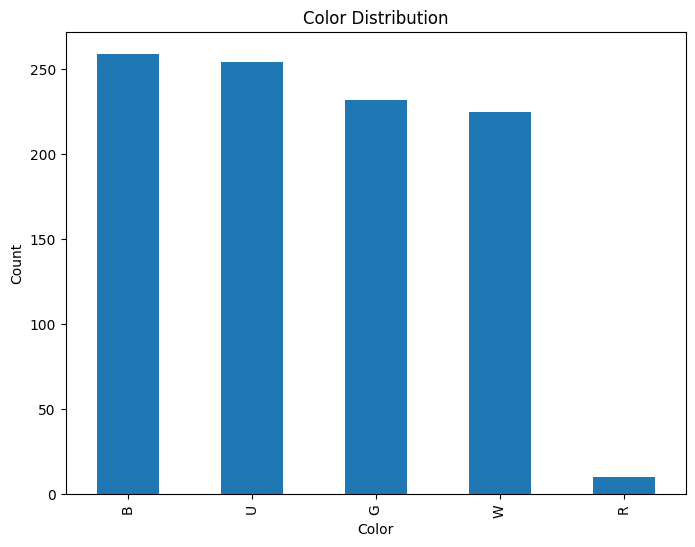

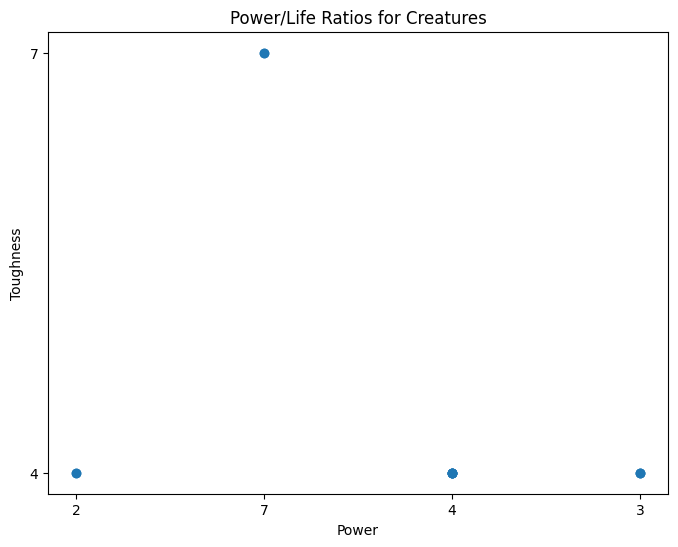

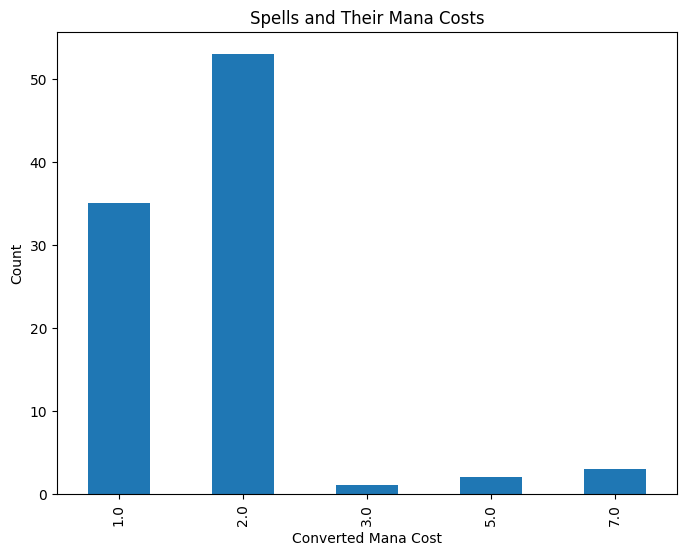

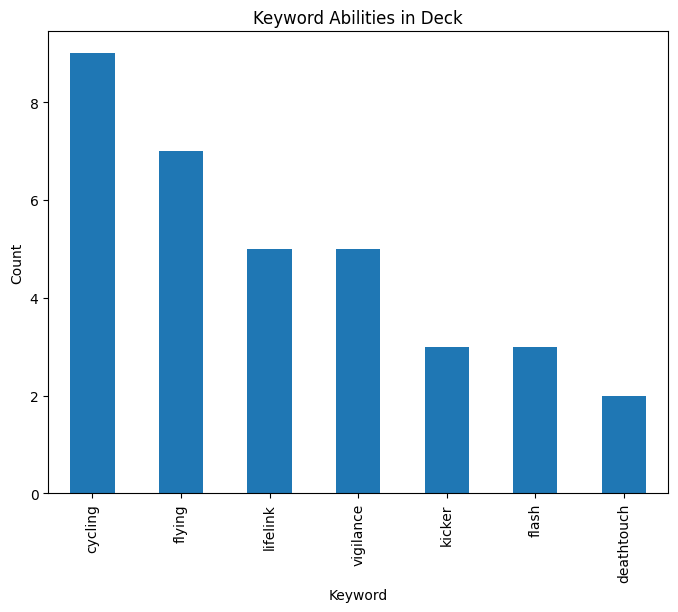

In [10]:
def load_deck_from_txt(filename):
    deck = []
    with open(filename, 'r') as file:
        for line in file:
            quantity, *card_name_parts = line.strip().split()
            card_name = ' '.join(card_name_parts)
            card = {
                'name': card_name,
                'quantity': int(quantity)
            }
            deck.append(card)
    return deck

def process_deck(deck_list):
    deck_dict = {}
    for card in deck_list:
        try:
            deck_dict[card['name']] = card['quantity']
        except ValueError as e:
            print(f"Error: {str(e)} - Skipping invalid card: {card}")
    return deck_dict

filename = "Deck_Domain_Ramp.txt"
deck_text = load_deck_from_txt(filename)
deck = process_deck(deck_text)

with open("mtg_cards.json", "r", encoding="utf-8") as f:
    all_cards = json.load(f)

# Extracting relevant cards data
deck_cards = [card for card in all_cards if card['name'] in deck]

# Convert the card data into a DataFrame for easier analysis
df_deck = pd.DataFrame(deck_cards)

# Example Visualization: Mana Curve
df_deck['cmc'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6))
plt.title('Mana Curve')
plt.xlabel('Converted Mana Cost')
plt.ylabel('Card Count')
plt.show()

# Card Types
df_deck['type_line'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Card Types Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Color Distribution
colors = df_deck['color_identity'].apply(pd.Series).stack().value_counts()
colors.plot(kind='bar', figsize=(8, 6))
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

# Power/Life Ratios for Creatures
creatures = df_deck[df_deck['type_line'].str.contains('Creature')]
plt.figure(figsize=(8, 6))
plt.scatter(creatures['power'], creatures['toughness'])
plt.title('Power/Life Ratios for Creatures')
plt.xlabel('Power')
plt.ylabel('Toughness')
plt.show()

# Spells & Their Costs
spells = df_deck[df_deck['type_line'].str.contains('Instant|Sorcery')]
spells['cmc'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6))
plt.title('Spells and Their Mana Costs')
plt.xlabel('Converted Mana Cost')
plt.ylabel('Count')
plt.show()

keywords_dict = mtg_abilities

# Keywords Analysis
keywords_in_deck = []
for card in deck_cards:
    for keyword, desc in keywords_dict.items():
        if keyword in card['oracle_text'].lower():
            keywords_in_deck.append(keyword)

pd.Series(keywords_in_deck).value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Keyword Abilities in Deck')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.show()

### Storage of Analysis in JSON ###

# Extracting and storing summarized statistics in a dictionary
analysis_summary = {
    'average_cmc': df_deck['cmc'].mean(),
    'color_distribution': colors.to_dict(),
    'type_distribution': df_deck['type_line'].value_counts().to_dict(),
    'creature_power_life_ratio': creatures[['power', 'toughness']].mean().to_dict(),
    'spell_cost_distribution': spells['cmc'].value_counts().sort_index().to_dict(),
    'keywords_in_deck': pd.Series(keywords_in_deck).value_counts().to_dict()
}

# Storing the analysis summary as a JSON
with open("deck_analysis_summary.json", "w", encoding="utf-8") as f:
    json.dump(analysis_summary, f, ensure_ascii=False, indent=4)


In [11]:
def get_deck_stats(deck):
    colors = {'white': 0, 'blue': 0, 'black': 0, 'red': 0, 'green': 0}
    total_cost = 0
    creature_count = 0
    instant_count = 0
    sorcery_count = 0
    enchantment_count = 0
    artifact_count = 0
    legendary_count = 0
    total_power = 0
    total_toughness = 0
    
    for card in deck:
        # Assuming 'cost' to be the CMC (Converted Mana Cost) which should be a number
        total_cost += card.get('cost', 0)  

        # Adding to the color count
        card_color = card.get('color', None)
        if card_color:
            colors[card_color] += 1
        
        # Counting types of cards
        card_type = card.get('type', '')
        if 'Creature' in card_type:
            creature_count += 1
            # Assuming that all creatures have 'power' and 'toughness' as numbers
            total_power += card.get('power', 0)  
            total_toughness += card.get('toughness', 0)
        elif 'Instant' in card_type:
            instant_count += 1
        elif 'Sorcery' in card_type:
            sorcery_count += 1
        elif 'Enchantment' in card_type:
            enchantment_count += 1
        elif 'Artifact' in card_type:
            artifact_count += 1
        
        # Counting legendary cards
        if 'Legendary' in card.get('super_type', ''):
            legendary_count += 1
            
    # Calculating average power and toughness if there are creatures in the deck
    avg_power = total_power / creature_count if creature_count > 0 else 0
    avg_toughness = total_toughness / creature_count if creature_count > 0 else 0
    
    stats = {
        'avg_mana_cost': total_cost / len(deck) if len(deck) > 0 else 0,
        'color_ratio': colors,
        'total_cards': len(deck),
        'card_type_distribution': {
            'creatures': creature_count,
            'instants': instant_count,
            'sorceries': sorcery_count,
            'enchantments': enchantment_count,
            'artifacts': artifact_count
        },
        'legendary_count': legendary_count,
        'creature_stats': {
            'total_power': total_power,
            'total_toughness': total_toughness,
            'avg_power': avg_power,
            'avg_toughness': avg_toughness
        }
    }
    return stats

def save_deck_stats_to_json(deck_stats, filename='deck_stats.json'):
    with open(filename, 'w') as file:
        json.dump(deck_stats, file)
        
def generate_similar_deck(reference_deck_stats, card_pool, constraints={}):
    similar_deck = []
    
    if not constraints:
        constraints['colors'] = [color for color, count in reference_deck_stats['color_ratio'].items() if count > 0]
        constraints['max_avg_mana_cost'] = reference_deck_stats['avg_mana_cost']
        constraints['card_types'] = [ctype for ctype, count in reference_deck_stats['card_type_distribution'].items() if count > 0]
    
    # Add specific cards to the deck if they are in the card pool and remove them from the card pool
    specific_cards = constraints.get('specific_cards', [])
    card_pool[:] = [card for card in card_pool if card['name'] not in specific_cards]
    similar_deck.extend([card for card in card_pool if card['name'] in specific_cards])
    
    # Define function to check card against constraints
    def check_card_against_constraints(card, deck):
        # Check color
        if card['color'] not in constraints.get('colors', []):
            return False
        # Check max avg mana cost
        if card['cost'] > constraints.get('max_avg_mana_cost', float('inf')):
            return False
        # Check if card is excluded
        if card['name'] in constraints.get('exclude_cards', []):
            return False
        # Check min/max specific color
        if any(col_sum := sum(c['color'] == color for c in deck) < num for color, num in constraints.get('min_specific_color', {}).items()) or \
           any(col_sum > num for color, num in constraints.get('max_specific_color', {}).items()):
            return False
        # Check card types
        if card['type'] not in constraints.get('card_types', []):
            return False
        return True
    
    while len(similar_deck) < reference_deck_stats['total_cards']:
        card = random.choice(card_pool)
        
        # If card passes all constraints, add to deck
        if check_card_against_constraints(card, similar_deck):
            similar_deck.append(card)
            
            # If enough creatures, alter constraint to prevent more
            if sum(c['type'] == 'creature' for c in similar_deck) >= constraints.get('max_creatures', float('inf')):
                constraints['card_types'] = [t for t in constraints.get('card_types', []) if t != 'creature']
            
            # If max cards reached, break
            if len(similar_deck) >= reference_deck_stats['total_cards']:
                break
    
    return similar_deck

# Mock reference deck
reference_deck = 

# Calculate reference deck stats and save them to JSON
reference_deck_stats = get_deck_stats(reference_deck)
save_deck_stats_to_json(reference_deck_stats)

# User constraints
user_constraints = {
    'colors': ['red', 'white'],  # Deck must only contain these colors
    'max_avg_mana_cost': 3.5,  # Maximum average mana cost per card
    'min_creatures': 10,  # Minimum number of creatures in the deck
    'max_creatures': 15,  # Maximum number of creatures in the deck
    'specific_cards': ['CardX', 'CardY'],  # These cards must be included
    'exclude_cards': ['CardZ'],  # These cards must not be included
    'min_specific_color': {'red': 10},  # Minimum number of red cards
    'max_specific_color': {'white': 10},  # Maximum number of white cards
    'card_types': ['creature', 'spell'],  # The deck must contain these types of cards
}

# Generate a similar deck
new_deck = generate_similar_deck(reference_deck_stats, card_pool, user_constraints)

NameError: name 'card_pool' is not defined